<a href="https://colab.research.google.com/github/OrYSlliu/Labs/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 3

##Обработка пропущенных значений

Обработайте пропущенные значения:


* Удалите пропущенные значения
* Заполните при помощи медианы, среднего для числовых значений
* Заполните при помощи моды для категориальных значений
* Интерполируйте
Выведите статистку после каждого метода и объясните


In [25]:
!pip install scikit-learn

In [26]:
import pandas as pd

df = pd.read_csv('/content/education_expenditure_supplementary_data.csv', index_col = None, header = 0, engine='python' )
df


,country,institute_type,direct_expenditure_type,1995,2000,2005,2009,2010,2011
0,OECD Average,All Institutions,Public,4.9,4.9,5.0,5.4,5.4,5.3
1,Australia,All Institutions,Public,4.5,4.6,4.3,4.5,4.6,4.3
2,Austria,All Institutions,Public,5.3,5.4,5.2,5.7,5.6,5.5
3,Belgium,All Institutions,Public,5.0,5.1,5.8,6.4,6.4,6.4
4,Canada,All Institutions,Public,5.8,5.2,4.8,5.0,5.2,NaN
...,...,...,...,...,...,...,...,...,...
328,Turkey,Higher Education Institutions,Total,NaN,NaN,NaN,NaN,NaN,NaN
329,United Kingdom,Higher Education Institutions,Total,NaN,NaN,NaN,NaN,NaN,1.2
330,United States,Higher Education Institutions,Total,NaN,NaN,NaN,NaN,NaN,2.7
331,Brazil,Higher Education Institutions,Total,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df.describe()

,1995,2000,2005,2009,2010,2011
count,94.000000,99.000000,106.000000,103.000000,101.000000,282.000000
mean,3.106383,3.062626,3.142453,3.388350,3.392079,2.573050
std,1.790465,1.725475,1.752329,1.869534,1.883119,2.130673
min,0.100000,0.500000,0.300000,0.300000,0.500000,0.000000
25%,1.100000,1.200000,1.200000,1.350000,1.300000,0.700000
50%,3.400000,3.300000,3.450000,3.700000,3.600000,1.750000
75%,4.500000,4.350000,4.300000,4.850000,4.800000,4.300000
max,6.800000,6.600000,7.200000,7.500000,7.600000,7.900000


In [28]:
#Удаление
df_dropna = df.dropna()
df_dropna

,country,institute_type,direct_expenditure_type,1995,2000,2005,2009,2010,2011
0,OECD Average,All Institutions,Public,4.9,4.9,5.0,5.4,5.4,5.3
1,Australia,All Institutions,Public,4.5,4.6,4.3,4.5,4.6,4.3
2,Austria,All Institutions,Public,5.3,5.4,5.2,5.7,5.6,5.5
3,Belgium,All Institutions,Public,5.0,5.1,5.8,6.4,6.4,6.4
6,Czech Republic,All Institutions,Public,4.8,4.2,4.1,4.2,4.1,4.4
...,...,...,...,...,...,...,...,...,...
104,Sweden,Higher Education Institutions,Public,1.6,1.5,1.5,1.6,1.6,1.6
105,Switzerland,Higher Education Institutions,Public,1.1,1.2,1.4,1.4,1.3,1.3
107,United Kingdom,Higher Education Institutions,Public,0.7,0.7,0.9,0.6,0.7,0.9
108,United States,Higher Education Institutions,Public,1.1,0.8,1.0,1.1,1.0,0.9


In [29]:
df_dropna.describe()

,1995,2000,2005,2009,2010,2011
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,3.189873,3.129114,3.231646,3.465823,3.448101,3.372152
std,1.804737,1.744232,1.795046,1.899992,1.925860,1.881621
min,0.300000,0.500000,0.500000,0.500000,0.500000,0.500000
25%,1.100000,1.200000,1.200000,1.400000,1.350000,1.300000
50%,3.400000,3.400000,3.600000,3.800000,3.700000,3.600000
75%,4.600000,4.450000,4.350000,4.900000,4.800000,4.750000
max,6.800000,6.400000,7.200000,7.500000,7.600000,7.500000


In [30]:
#Заполнение при помощи медианы
df_median = df.fillna(df.median())
df_median

<ipython-input-30-6a577d7463c3>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_median = df.fillna(df.median())


,country,institute_type,direct_expenditure_type,1995,2000,2005,2009,2010,2011
0,OECD Average,All Institutions,Public,4.9,4.9,5.00,5.4,5.4,5.30
1,Australia,All Institutions,Public,4.5,4.6,4.30,4.5,4.6,4.30
2,Austria,All Institutions,Public,5.3,5.4,5.20,5.7,5.6,5.50
3,Belgium,All Institutions,Public,5.0,5.1,5.80,6.4,6.4,6.40
4,Canada,All Institutions,Public,5.8,5.2,4.80,5.0,5.2,1.75
...,...,...,...,...,...,...,...,...,...
328,Turkey,Higher Education Institutions,Total,3.4,3.3,3.45,3.7,3.6,1.75
329,United Kingdom,Higher Education Institutions,Total,3.4,3.3,3.45,3.7,3.6,1.20
330,United States,Higher Education Institutions,Total,3.4,3.3,3.45,3.7,3.6,2.70
331,Brazil,Higher Education Institutions,Total,3.4,3.3,3.45,3.7,3.6,1.75


In [31]:
df_median.describe()

,1995,2000,2005,2009,2010,2011
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,3.317117,3.229429,3.352102,3.603604,3.536937,2.446997
std,0.956828,0.943736,0.995855,1.046244,1.037919,1.982553
min,0.100000,0.500000,0.300000,0.300000,0.500000,0.000000
25%,3.400000,3.300000,3.450000,3.700000,3.600000,0.900000
50%,3.400000,3.300000,3.450000,3.700000,3.600000,1.750000
75%,3.400000,3.300000,3.450000,3.700000,3.600000,3.900000
max,6.800000,6.600000,7.200000,7.500000,7.600000,7.900000


In [32]:
#Заполнение при помощи среднего
df_average = df.fillna(df.std())
df_average

<ipython-input-32-5dd4f768533d>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_average = df.fillna(df.std())


,country,institute_type,direct_expenditure_type,1995,2000,2005,2009,2010,2011
0,OECD Average,All Institutions,Public,4.900000,4.900000,5.000000,5.400000,5.400000,5.300000
1,Australia,All Institutions,Public,4.500000,4.600000,4.300000,4.500000,4.600000,4.300000
2,Austria,All Institutions,Public,5.300000,5.400000,5.200000,5.700000,5.600000,5.500000
3,Belgium,All Institutions,Public,5.000000,5.100000,5.800000,6.400000,6.400000,6.400000
4,Canada,All Institutions,Public,5.800000,5.200000,4.800000,5.000000,5.200000,2.130673
...,...,...,...,...,...,...,...,...,...
328,Turkey,Higher Education Institutions,Total,1.790465,1.725475,1.752329,1.869534,1.883119,2.130673
329,United Kingdom,Higher Education Institutions,Total,1.790465,1.725475,1.752329,1.869534,1.883119,1.200000
330,United States,Higher Education Institutions,Total,1.790465,1.725475,1.752329,1.869534,1.883119,2.700000
331,Brazil,Higher Education Institutions,Total,1.790465,1.725475,1.752329,1.869534,1.883119,2.130673


In [33]:
df_average.describe()

,1995,2000,2005,2009,2010,2011
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,2.161925,2.123006,2.194831,2.339318,2.340792,2.505298
std,1.117983,1.119591,1.179716,1.252244,1.245274,1.966686
min,0.100000,0.500000,0.300000,0.300000,0.500000,0.000000
25%,1.790465,1.725475,1.752329,1.869534,1.883119,0.900000
50%,1.790465,1.725475,1.752329,1.869534,1.883119,2.130673
75%,1.790465,1.725475,1.752329,1.869534,1.883119,3.900000
max,6.800000,6.600000,7.200000,7.500000,7.600000,7.900000


In [34]:
#Заполнение при помощи моды
df_mode =df.fillna(df['1995'].mode()[0])
df_mode

,country,institute_type,direct_expenditure_type,1995,2000,2005,2009,2010,2011
0,OECD Average,All Institutions,Public,4.9,4.9,5.0,5.4,5.4,5.3
1,Australia,All Institutions,Public,4.5,4.6,4.3,4.5,4.6,4.3
2,Austria,All Institutions,Public,5.3,5.4,5.2,5.7,5.6,5.5
3,Belgium,All Institutions,Public,5.0,5.1,5.8,6.4,6.4,6.4
4,Canada,All Institutions,Public,5.8,5.2,4.8,5.0,5.2,0.8
...,...,...,...,...,...,...,...,...,...
328,Turkey,Higher Education Institutions,Total,0.8,0.8,0.8,0.8,0.8,0.8
329,United Kingdom,Higher Education Institutions,Total,0.8,0.8,0.8,0.8,0.8,1.2
330,United States,Higher Education Institutions,Total,0.8,0.8,0.8,0.8,0.8,2.7
331,Brazil,Higher Education Institutions,Total,0.8,0.8,0.8,0.8,0.8,0.8


In [35]:
df_mode.describe()

,1995,2000,2005,2009,2010,2011
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,1.451051,1.472673,1.545646,1.600601,1.586186,2.301502
std,1.406752,1.396986,1.471523,1.584108,1.578657,2.061881
min,0.100000,0.500000,0.300000,0.300000,0.500000,0.000000
25%,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000
50%,0.800000,0.800000,0.800000,0.800000,0.800000,1.300000
75%,0.800000,0.900000,1.000000,1.100000,1.100000,3.900000
max,6.800000,6.600000,7.200000,7.500000,7.600000,7.900000


In [36]:
#Заполнение при помощи интерполяции
df_interpolyar = df.fillna(df.interpolate())
df_interpolyar

,country,institute_type,direct_expenditure_type,1995,2000,2005,2009,2010,2011
0,OECD Average,All Institutions,Public,4.9,4.9,5.0,5.4,5.4,5.300000
1,Australia,All Institutions,Public,4.5,4.6,4.3,4.5,4.6,4.300000
2,Austria,All Institutions,Public,5.3,5.4,5.2,5.7,5.6,5.500000
3,Belgium,All Institutions,Public,5.0,5.1,5.8,6.4,6.4,6.400000
4,Canada,All Institutions,Public,5.8,5.2,4.8,5.0,5.2,5.150000
...,...,...,...,...,...,...,...,...,...
328,Turkey,Higher Education Institutions,Total,0.7,0.5,0.8,1.2,1.0,1.366667
329,United Kingdom,Higher Education Institutions,Total,0.7,0.5,0.8,1.2,1.0,1.200000
330,United States,Higher Education Institutions,Total,0.7,0.5,0.8,1.2,1.0,2.700000
331,Brazil,Higher Education Institutions,Total,0.7,0.5,0.8,1.2,1.0,2.050000


In [37]:
df_interpolyar.describe()

,1995,2000,2005,2009,2010,2011
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,1.502402,1.348198,1.581231,1.923123,1.789940,2.560661
std,1.531620,1.554738,1.499488,1.484039,1.559163,2.132009
min,0.100000,0.500000,0.300000,0.300000,0.500000,0.000000
25%,0.700000,0.500000,0.800000,1.200000,1.000000,0.700000
50%,0.700000,0.500000,0.800000,1.200000,1.000000,1.700000
75%,1.100000,1.200000,1.200000,1.300000,1.300000,4.300000
max,6.800000,6.600000,7.200000,7.500000,7.600000,7.900000


**Объясните**

##Поиск выбросов и аномалий

**Те, кто выполняет задания со * делают поиск выбросов с помощью написанного ранее класса**

Найти выбросы по числовой переменной (использовать метод основанный на среднем и на межквартильном размахе). Объясните результат

Вывести статистику с выбросами и без. Сравните и объясните результат


In [38]:
import math
import numpy as np
from statistics import median, mean
from sklearn.cluster import DBSCAN

class Outline:
  def __init__(self, df):
    self.df = df
  def detect_outline_by_quantile(self, column_name):
        Q1 = self.df[column_name].quantile(0.25)
        Q3 = self.df[column_name].quantile(0.75)
        minimum = Q1 - 1.5 * (Q3 - Q1)
        maximum = Q3 + 1.5 * (Q3 - Q1)
        outliers = self.df[(self.df[column_name] < minimum) | (self.df[column_name] > maximum)]
        return outliers

  def detect_outline_by_mean_std(self,column_name,coef):
        mean = self.df[column_name].mean()
        median = self.df[column_name].median()
        std = self.df[column_name].std()
        n = self.df[column_name].count()
        lower_bound = mean - coef  * std
        upper_bound = mean + coef * std
        outliners = self.df[(self.df[column_name] >= lower_bound) & (self.df[column_name]<=upper_bound)]
        return outliners

In [109]:
#При помощи межквартильного размаха
df_copy = df.copy().dropna()
df_copy['2000'].describe()

count    79.000000
mean      3.129114
std       1.744232
min       0.500000
25%       1.200000
50%       3.400000
75%       4.450000
max       6.400000
Name: 2000, dtype: float64

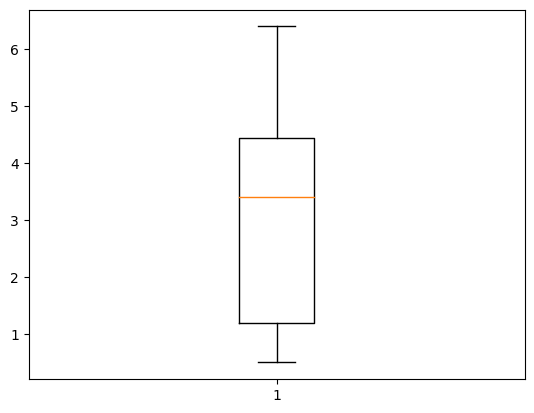

In [75]:
import matplotlib.pyplot as plt
plt.boxplot(df_copy['2000'])
plt.show()

In [76]:
df_copy.loc[0:10,"2000"] = 10
df_copy['2000'].describe()

count    79.000000
mean      3.612658
std       2.674877
min       0.500000
25%       1.200000
50%       3.400000
75%       4.500000
max      10.000000
Name: 2000, dtype: float64

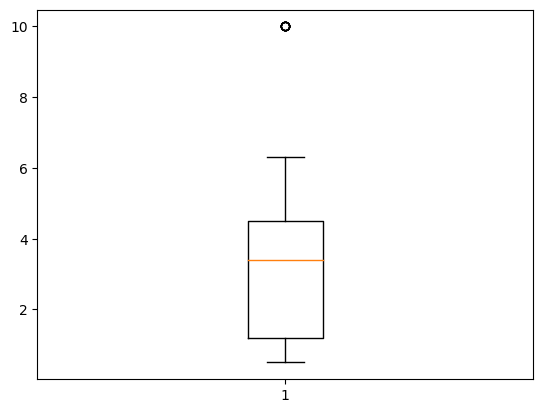

In [77]:
plt.boxplot(df_copy['2000'])
plt.show()

In [104]:
so = Outline(df_copy)
out = so.detect_outline_by_quantile('2000')

In [105]:
out['2000'].describe()

count     8.0
mean     10.0
std       0.0
min      10.0
25%      10.0
50%      10.0
75%      10.0
max      10.0
Name: 2000, dtype: float64

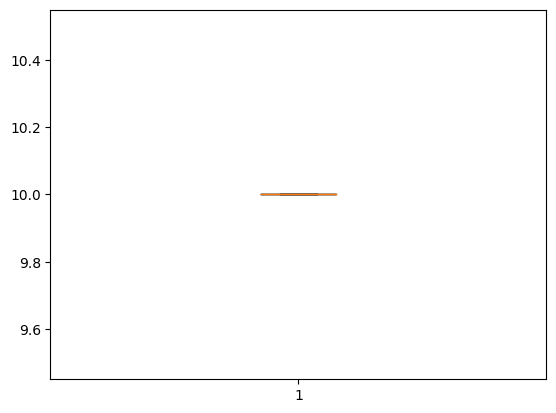

In [107]:
plt.boxplot(out['2000'])
plt.show()

В датасете не было выбросов поэтому я их добавил. С помошью межквартильного размаха нашел выбросы

**Объяснения**

##Дубликаты

Проверьте датафрейм на дубликаты и удалите их, если дублей нет - создайте.

In [126]:
#Проверка на дубли и удаление их
df_dublicate = df.drop_duplicates()

if len(df) == len(df_dublicate ) :
  print(True)
else:
  print(False)

True


## Преобразование признаков

Масштабируйте числовые признаки через MinMaxScaler, StandardScaler

In [130]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Creating instances
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

In [127]:
num_features = df.select_dtypes(include=['float64','int64']).columns
num_features

Index(['1995', '2000', '2005', '2009', '2010', '2011'], dtype='object')

In [128]:
for col in num_features:
    print(df[col].unique())

[4.9 4.5 5.3 5.  5.8 nan 4.8 6.5 6.6 3.7 4.7 3.6 4.3 4.6 6.8 5.2 5.4 5.5
 2.2 3.4 3.5 3.2 3.8 4.  4.2 4.1 2.9 2.8 3.3 3.  4.4 1.4 1.9 0.9 1.2 1.5
 0.7 1.3 1.7 1.  0.8 0.4 0.3 0.1 1.1 1.6]
[4.9 4.6 5.4 5.1 5.2 4.2 6.4 nan 5.5 5.7 4.3 3.7 4.4 4.1 6.6 4.5 3.5 4.7
 5.8 5.6 4.  6.3 5.3 3.4 3.  3.3 3.2 2.8 2.9 2.7 3.6 3.1 3.8 2.4 1.7 1.
 0.8 1.2 1.6 0.6 1.5 0.9 1.1 0.7 0.5]
[5.  4.3 5.2 5.8 4.8 3.3 4.1 6.8 4.7 5.9 5.6 4.2 4.  5.1 7.2 6.2 3.4 nan
 5.3 4.6 5.7 5.4 3.7 4.9 4.4 3.8 3.5 3.9 2.7 2.8 2.5 3.2 2.6 3.6 1.9 1.
 0.8 1.2 1.5 0.3 1.6 0.9 1.7 1.1 1.4 0.6 0.5 1.3 0.7]
[5.4 4.5 5.7 6.4 5.  4.1 4.2 7.5 5.9 6.3 5.8 nan 4.8 7.3 6.  3.6 4.9 5.3
 6.1 5.5 6.6 4.7 3.7 3.8 4.3 3.4 3.3 2.6 2.9 3.  4.6 2.7 3.2 3.5 4.  3.1
 2.3 1.1 0.7 1.4 1.5 0.3 1.  1.8 1.3 1.2 0.8 0.5 1.6 0.6]
[5.4 4.6 5.6 6.4 5.2 4.3 4.1 7.6 5.8 nan 7.  6.  5.9 3.6 4.8 5.1 7.5 5.
 4.  6.3 3.7 3.5 2.9 2.6 4.7 3.9 3.8 2.8 3.1 3.4 4.4 3.  2.5 2.  1.1 0.8
 1.5 1.4 1.6 1.  1.8 1.3 1.9 0.5 0.7 0.9]
[5.3 4.3 5.5 6.4 nan 3.9 4.4 7.5 5.2 6.

In [131]:
df_minmax_scaled = df.copy()
df_minmax_scaled[num_features] = min_max_scaler.fit_transform(df[num_features])
for col in num_features:
    print(df_minmax_scaled[col].unique())

[0.71641791 0.65671642 0.7761194  0.73134328 0.85074627        nan
 0.70149254 0.95522388 0.97014925 0.53731343 0.68656716 0.52238806
 0.62686567 0.67164179 1.         0.76119403 0.79104478 0.80597015
 0.31343284 0.49253731 0.50746269 0.46268657 0.55223881 0.58208955
 0.6119403  0.59701493 0.41791045 0.40298507 0.47761194 0.43283582
 0.64179104 0.19402985 0.26865672 0.11940299 0.1641791  0.20895522
 0.08955224 0.17910448 0.23880597 0.13432836 0.10447761 0.04477612
 0.02985075 0.         0.14925373 0.2238806 ]
[0.72131148 0.67213115 0.80327869 0.75409836 0.7704918  0.60655738
 0.96721311        nan 0.81967213 0.85245902 0.62295082 0.52459016
 0.63934426 0.59016393 1.         0.6557377  0.49180328 0.68852459
 0.86885246 0.83606557 0.57377049 0.95081967 0.78688525 0.47540984
 0.40983607 0.45901639 0.44262295 0.37704918 0.39344262 0.36065574
 0.50819672 0.42622951 0.54098361 0.31147541 0.19672131 0.08196721
 0.04918033 0.1147541  0.18032787 0.01639344 0.16393443 0.06557377
 0.09836066 0.03

In [132]:
df_standart_scaled = df.copy()
df_standart_scaled[num_features] = standard_scaler.fit_transform(df[num_features])
for col in num_features:
    print(df_standart_scaled[col].unique())

[ 1.0071318   0.78252827  1.23173533  1.06328268  1.51248975         nan
  0.95098092  1.90554593  1.96169682  0.3333212   0.89483003  0.27717032
  0.6702265   0.83867915  2.07399858  1.17558445  1.28788622  1.3440371
 -0.50894205  0.16486855  0.22101943  0.05256678  0.38947208  0.50177385
  0.61407562  0.55792473 -0.11588587 -0.17203675  0.10871767 -0.05973498
  0.72637738 -0.95814912 -0.6773947  -1.23890353 -1.07045088 -0.90199823
 -1.3512053  -1.0143     -0.78969647 -1.18275265 -1.29505442 -1.51965795
 -1.57580883 -1.6881106  -1.12660177 -0.84584735]
[ 1.07027038  0.89552035  1.36152043  1.1867704   1.24502041  0.66252031
  1.94402052         nan  1.41977044  1.53627046  0.72077032  0.37127026
  0.77902033  0.6042703   2.06052054  0.83727034  0.25477024  0.95377036
  1.59452047  1.47802045  0.54602029  1.88577051  1.30327042  0.19652023
 -0.0364798   0.13827022  0.08002022 -0.15297982 -0.09472981 -0.21122983
  0.31302025  0.02177021  0.42952027 -0.38597986 -0.79372993 -1.20148
 -1.3

In [135]:
df_scaled = df.copy() # копируем df, чтобы по ссылке не изменять оригинальный
df_scaled[num_features] = df_standart_scaled[num_features]

In [136]:
df_scaled

,country,institute_type,direct_expenditure_type,1995,2000,2005,2009,2010,2011
0,OECD Average,All Institutions,Public,1.007132,1.07027,1.065081,1.081279,1.071592,1.282129
1,Australia,All Institutions,Public,0.782528,0.89552,0.663715,0.597521,0.644646,0.811959
2,Austria,All Institutions,Public,1.231735,1.36152,1.179757,1.242531,1.178329,1.376163
3,Belgium,All Institutions,Public,1.063283,1.18677,1.523785,1.618787,1.605275,1.799316
4,Canada,All Institutions,Public,1.512490,1.24502,0.950405,0.866276,0.964856,NaN
...,...,...,...,...,...,...,...,...,...
328,Turkey,Higher Education Institutions,Total,NaN,NaN,NaN,NaN,NaN,NaN
329,United Kingdom,Higher Education Institutions,Total,NaN,NaN,NaN,NaN,NaN,-0.645566
330,United States,Higher Education Institutions,Total,NaN,NaN,NaN,NaN,NaN,0.059688
331,Brazil,Higher Education Institutions,Total,NaN,NaN,NaN,NaN,NaN,NaN


Масштабируйте категориальные признаки через OneHotEncoder

In [139]:
df.columns

Index(['country', 'institute_type', 'direct_expenditure_type', '1995', '2000',
       '2005', '2009', '2010', '2011'],
      dtype='object')

In [140]:
from sklearn.preprocessing import OneHotEncoder

df.country = df.country.astype("category")
df.institute_type = df.institute_type.astype("category")
df.direct_expenditure_type = df.direct_expenditure_type.astype("category")
category_cols = df.select_dtypes(include=['category']).columns
encoder = OneHotEncoder()

df_encoded = pd.get_dummies(df, columns=category_cols, drop_first=True)
encoded_features = encoder.fit_transform(df[category_cols])
encoded_columns = encoder.get_feature_names_out(category_cols)

encoded_columns

array(['country_  Brazil', 'country_  Russian Federation',
       'country_Australia', 'country_Austria', 'country_Belgium',
       'country_Canada', 'country_Chile', 'country_Czech Republic',
       'country_Denmark', 'country_Estonia', 'country_Finland',
       'country_France', 'country_Germany', 'country_Greece',
       'country_Hungary', 'country_Iceland', 'country_Ireland',
       'country_Israel', 'country_Italy', 'country_Japan',
       'country_Korea, Republic of', 'country_Luxembourg',
       'country_Mexico', 'country_Netherlands', 'country_New Zealand',
       'country_Norway', 'country_OECD Average', 'country_Poland',
       'country_Portugal', 'country_Slovak Republic', 'country_Slovenia',
       'country_Spain', 'country_Sweden', 'country_Switzerland',
       'country_Turkey', 'country_United Kingdom',
       'country_United States', 'institute_type_All Institutions ',
       'institute_type_Elementary and Secondary Institutions ',
       'institute_type_Higher Education

In [141]:
df_encoded

,1995,2000,2005,2009,2010,2011,country_ Russian Federation,country_Australia,country_Austria,country_Belgium,...,country_Spain,country_Sweden,country_Switzerland,country_Turkey,country_United Kingdom,country_United States,institute_type_Elementary and Secondary Institutions,institute_type_Higher Education Institutions,direct_expenditure_type_Public,direct_expenditure_type_Total
0,4.9,4.9,5.0,5.4,5.4,5.3,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,4.5,4.6,4.3,4.5,4.6,4.3,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,5.3,5.4,5.2,5.7,5.6,5.5,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,5.0,5.1,5.8,6.4,6.4,6.4,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,5.8,5.2,4.8,5.0,5.2,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
329,NaN,NaN,NaN,NaN,NaN,1.2,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
330,NaN,NaN,NaN,NaN,NaN,2.7,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
331,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


##Задание для гениев*


Реализовать расчет корреляции Спирмана

In [148]:
#Функция по расчету тут
import pandas as pd
import numpy as np
from scipy.stats import spearmanr


def corr_spearman(column_1, column_2):
  rho, p = spearmanr(df[column_1].fillna(0), df[column_2].fillna(0))
  return rho

In [149]:
#Пример использования тут и объяснение принципа работы
corr_spearman("1995","2000")

0.9229782901750031

Есть 2 переменные(колонки), у нас это рейтинг за 1995 год и за 2000 год Для кажой переменной присвоим ранги, то есть значение которое показывает на сколько каждое значение больше или меньше других Затем для каждой пары значений мы вычисляем разницу в рангах, и возводим её в квадрат Суммируем все квадраты разниц p = 1 - 6(сумма разницы)/ n(n**2 - 1) по этой формуле получаем корреляцию n - это количество наших пар значений

###Пример реализации

In [ ]:
import pandas as pd
import numpy as np


def corr_pearson(column_1, column_2):
  cov = np.cov(column_1, column_2)
  return cov/(column_1.std() * column_2.std())

In [ ]:
data = {
    'Рост': [170, 155, 180, 162, 175],
    'Вес': [65, 50, 75, 55, 70]
}
df = pd.DataFrame(data)
df

,Рост,Вес
0,170,65
1,155,50
2,180,75
3,162,55
4,175,70


In [ ]:
corr_pearson(df["Рост"], df["Вес"])

array([[0.96593129, 0.99674864],
       [0.99674864, 1.03527033]])